# Rincón de Práctica

## Datos Panel usando R


### Exploración inicial

In [3]:
# Lectura de datos y exploración inicial de la base

library(foreign)
Panel <- read.dta("http://dss.princeton.edu/training/Panel101.dta") # Source: http://dss.princeton.edu/training, 
View(head(Panel,10))


,country,year,y,y_bin,x1,x2,x3,opinion,op
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,A,1990,1342787840,1,0.27790365,-1.1079559,0.28255358,Str agree,1
2,A,1991,-1899660544,0,0.32068470,-0.9487200,0.49253848,Disag,0
3,A,1992,-11234363,0,0.36346573,-0.7894840,0.70252335,Disag,0
4,A,1993,2645775360,1,0.24614404,-0.8855330,-0.09439092,Disag,0
5,A,1994,3008334848,1,0.42462304,-0.7297683,0.94613063,Disag,0
6,A,1995,3229574144,1,0.47721413,-0.7232460,1.02968037,Str agree,1
7,A,1996,2756754176,1,0.49980500,-0.7815716,1.09228814,Disag,0
8,A,1997,2771810560,1,0.05162839,-0.7048455,1.41590083,Str agree,1
9,A,1998,3397338880,1,0.36641079,-0.6983712,1.54872274,Disag,0


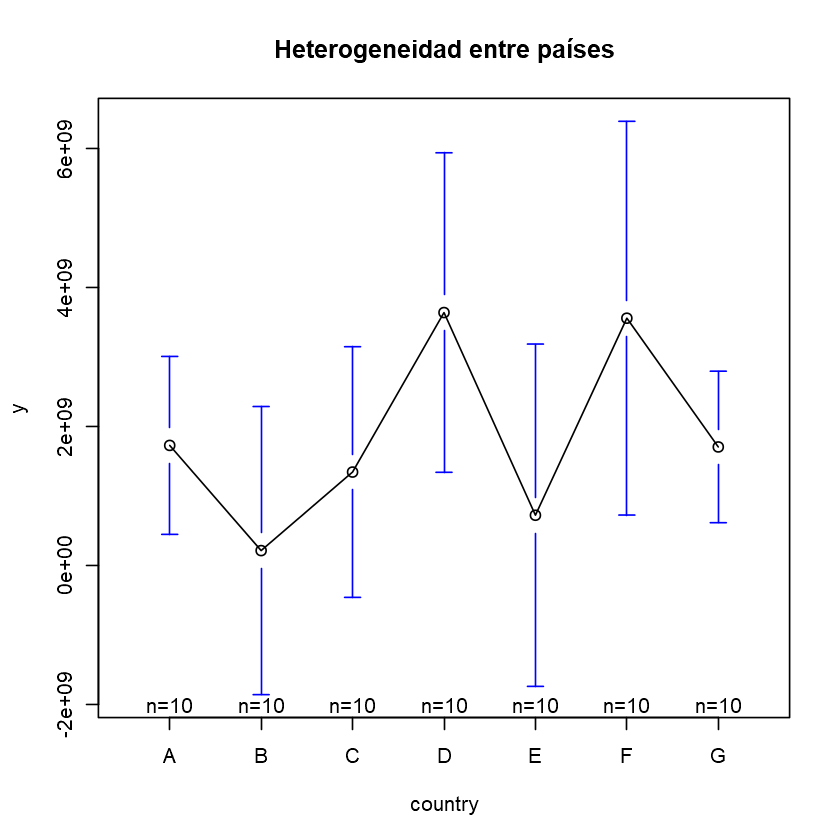

In [8]:
# gráficamente: diferencias entre países

library(gplots)
plotmeans(y ~ country, main="Heterogeneidad entre países", data=Panel)


Warning message in plot.window(...):
""reg.line" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""reg.line" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"
Warning message in box(...):
""reg.line" is not a graphical parameter"
Warning message in title(...):
""reg.line" is not a graphical parameter"


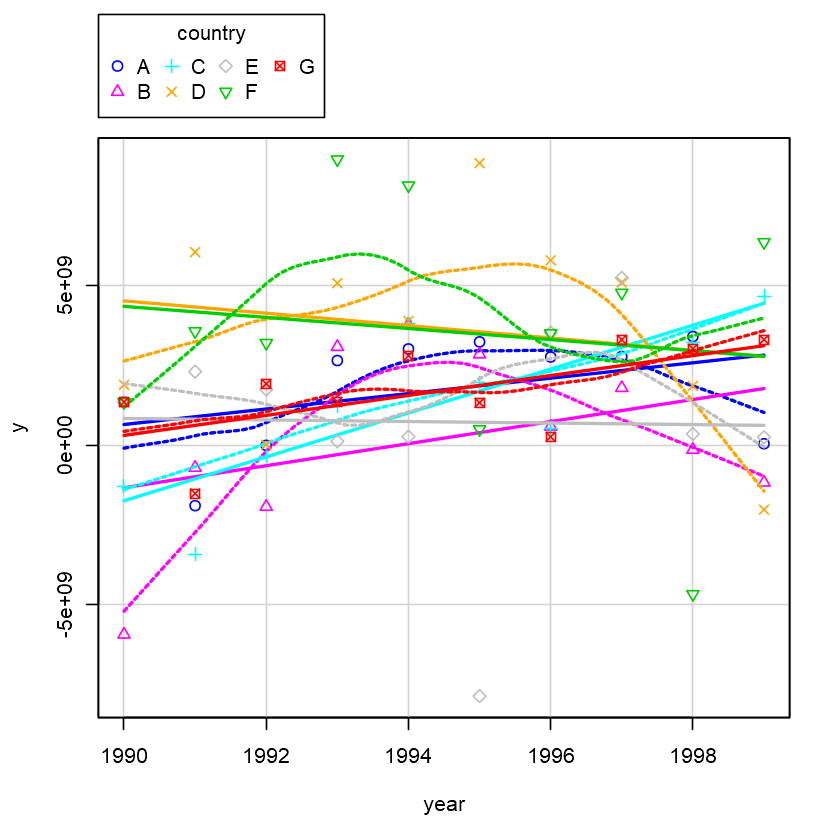

In [11]:
# gráficamente: diferencias a través del tiempo

library(car)
scatterplot(y~year|country, boxplots=FALSE, smooth=TRUE, reg.line=FALSE, data=Panel)


### Estimación OLS

$$y_{it}=\beta_0 + \beta_1x_{it}+u_{it}$$

In [13]:
# Usando OLS notar que no es est. sig.

OLS <-lm(y ~ x1, data=Panel)
panderOptions('digits',4)
pander(OLS)




|     &nbsp;      | Estimate  | Std. Error | t value | Pr(>|t|) |
|:---------------:|:---------:|:----------:|:-------:|:--------:|
| **(Intercept)** | 1.524e+09 | 621072624  |  2.454  | 0.01668  |
|     **x1**      | 4.95e+08  | 778861261  | 0.6355  |  0.5272  |

Table: Fitting linear model: y ~ x1



### Estimación LSDV

$$y_{it}=\sum_i\alpha_i d_i + \beta_1x_{it}+u_{it}$$
lo mismo que 
$$y_{it}=\alpha_AD_A+\alpha_BD_B+...+\beta_1x_{it}+u_{it}$$

In [14]:
# Usando LSDV notar que x1 es ahora est. sign.

FE.D <-lm(y ~ x1 + factor(country) - 1, data = Panel)
pander(coefficients(summary(FE.D)))



|        &nbsp;        |  Estimate  | Std. Error | t value | Pr(>|t|)  |
|:--------------------:|:----------:|:----------:|:-------:|:---------:|
|        **x1**        | 2.476e+09  | 1.107e+09  |  2.237  |  0.02889  |
| **factor(country)A** | 880542404  | 961807052  | 0.9155  |  0.3635   |
| **factor(country)B** | -1.058e+09 | 1.051e+09  | -1.006  |  0.3181   |
| **factor(country)C** | -1.723e+09 | 1.632e+09  | -1.056  |  0.2951   |
| **factor(country)D** | 3.163e+09  | 909459150  |  3.478  | 0.0009303 |
| **factor(country)E** | -602622000 | 1.064e+09  | -0.5662 |  0.5733   |
| **factor(country)F** | 2.011e+09  | 1.123e+09  |  1.791  |  0.07821  |
| **factor(country)G** | -984717493 | 1.493e+09  | -0.6597 |  0.5119   |



### Estimación FE

Within Estimator: regresión de $(y_{it}-\bar{y}_i)$ sobre $(x_{it}-\bar{x}_i)$


In [16]:
# USando FE el resultado es el mismo que LSDV 

FE <- plm(y ~ x1, data=Panel, index=c("country", "year"), model="within")
pander(coefficients(summary(FE)))




|        &nbsp;        |  Estimate  | Std. Error | t value | Pr(>|t|)  |
|:--------------------:|:----------:|:----------:|:-------:|:---------:|
|        **x1**        | 2.476e+09  | 1.107e+09  |  2.237  |  0.02889  |
| **factor(country)A** | 880542404  | 961807052  | 0.9155  |  0.3635   |
| **factor(country)B** | -1.058e+09 | 1.051e+09  | -1.006  |  0.3181   |
| **factor(country)C** | -1.723e+09 | 1.632e+09  | -1.056  |  0.2951   |
| **factor(country)D** | 3.163e+09  | 909459150  |  3.478  | 0.0009303 |
| **factor(country)E** | -602622000 | 1.064e+09  | -0.5662 |  0.5733   |
| **factor(country)F** | 2.011e+09  | 1.123e+09  |  1.791  |  0.07821  |
| **factor(country)G** | -984717493 | 1.493e+09  | -0.6597 |  0.5119   |

